<a href="https://colab.research.google.com/github/suhasparashar/ML/blob/master/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import datasets

In [0]:
iris = datasets.load_iris()

In [0]:
y = iris.target
x = iris.data

In [0]:
import numpy as np

In [0]:
x_0 = np.matrix(x[0:50])
x_1 = np.matrix(x[50:100])
x_2 = np.matrix(x[100:150])

y1 = np.append(y[0:50],y[50:100], axis = 0);
y2 = np.append(y[50:100],y[100:150], axis = 0);
y3 = np.append(y[100:150],y[0:50], axis = 0);

In [0]:
u_mean_0 = x_0.mean(0)
u_mean_1 = x_1.mean(0)
u_mean_2 = x_2.mean(0)
x_mean = np.matrix(x).mean(0)

In [0]:
s_b_1 = ((u_mean_1 - u_mean_0)*np.transpose(u_mean_1-u_mean_0) ) 
s_b_2 = ((u_mean_2 - u_mean_1)*np.transpose(u_mean_2-u_mean_1) ) 
s_b_3 = ((u_mean_0 - u_mean_2)*np.transpose(u_mean_0-u_mean_2) ) 

In [0]:
s_w_1 = (np.transpose(x_0 - u_mean_0)  * (x_0 - u_mean_0 ))+ (np.transpose(x_1 - u_mean_1) *(x_1 - u_mean_1) )
s_w_2 = (np.transpose(x_2 - u_mean_2)  * (x_2 - u_mean_2 ))+ (np.transpose(x_1 - u_mean_1) *(x_1 - u_mean_1) )
s_w_3 = (np.transpose(x_0 - u_mean_0)  * (x_0 - u_mean_0 ))+ (np.transpose(x_2 - u_mean_2) *(x_2 - u_mean_2) )

In [0]:
w1 = np.linalg.inv(s_w_1) * np.transpose(u_mean_1 - u_mean_0)
w2 = np.linalg.inv(s_w_2) * np.transpose(u_mean_2 - u_mean_1)
w3 = np.linalg.inv(s_w_3) * np.transpose(u_mean_0 - u_mean_2)

In [0]:
pred_x_1 = np.transpose(w1)*np.transpose(np.append(x_0,x_1, axis = 0))
pred_x_2 = np.transpose(w2)*np.transpose(np.append(x_1,x_2, axis = 0))
pred_x_3 = np.transpose(w3)*np.transpose(np.append(x_2,x_0, axis = 0))

In [0]:
# pred_x[pred_x > 0] =1
# pred_x[pred_x < 0] =0

# pred_x = pred_x.astype(int)
pred_x_1 = np.array(pred_x_1)[0]
pred_x_2 = np.array(pred_x_2)[0]
pred_x_3 = np.array(pred_x_3)[0]

In [0]:
np.linalg.inv(s_w_2)

matrix([[ 0.09885078, -0.0327603 , -0.08866307,  0.0292804 ],
        [-0.0327603 ,  0.17459685,  0.00476992, -0.11049354],
        [-0.08866307,  0.00476992,  0.13481156, -0.06602503],
        [ 0.0292804 , -0.11049354, -0.06602503,  0.30734625]])

In [0]:
import matplotlib.pyplot as plt

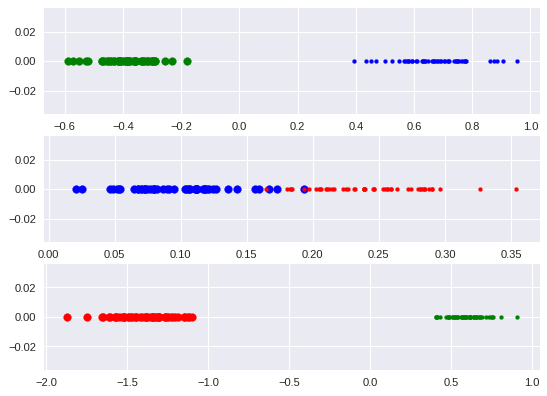

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(3,1,1)
plt.scatter(pred_x_1[np.where(y1==0)],np.zeros(50),marker='o',c='g')
#plt.plot(x[0:100,0], np.array(w1[0]* x[0:100,0])[0])
plt.scatter(pred_x_1[np.where(y1==1)],np.zeros(50),marker='.',c= 'b')
plt.subplot(3,1,2)
plt.scatter(pred_x_2[np.where(y2==1)],np.zeros(50),marker='o', c='b')
plt.scatter(pred_x_2[np.where(y2==2)],np.zeros(50),marker='.', c= 'r')

plt.subplot(3,1,3)
plt.scatter(pred_x_3[np.where(y3==2)],np.zeros(50),marker='o',c='r')
#plt.plot(x[0:100,0], np.array(w1[0]* x[0:100,0])[0])
plt.scatter(pred_x_3[np.where(y3==0)],np.zeros(50),marker='.',c= 'g')


plt.show()

In [0]:
len(w1[0]* x[0:100,0])

1

In [0]:
len(pred_x_2[pred_x_2<=0])

0

In [0]:
w1

matrix([[-0.03115072],
        [-0.18390775],
        [ 0.22210403],
        [ 0.31473638]])

In [0]:
w2

matrix([[-0.0362888 ],
        [-0.0569247 ],
        [ 0.07112375],
        [ 0.12638818]])

In [0]:
w3

matrix([[ 0.16164635],
        [ 0.12265414],
        [-0.37263656],
        [-0.37508147]])

In [0]:
print(u_mean_0)
print(u_mean_1 )
print(u_mean_2 )

[[5.006 3.428 1.462 0.246]]
[[5.936 2.77  4.26  1.326]]
[[6.588 2.974 5.552 2.026]]


In [0]:
s_w_1

matrix([[19.1434,  9.0356,  9.7634,  3.2394],
        [ 9.0356, 11.8658,  4.6232,  2.4746],
        [ 9.7634,  4.6232, 12.2978,  3.8794],
        [ 3.2394,  2.4746,  3.8794,  2.4604]])

In [0]:
np.where(y1==0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),)

In [0]:
x1 = [[1, 0, 1],[-1, 0, 1],[0, 1, 1],[0, -1, 1]]

In [0]:
y1 = [1, -1,1,-1]

In [0]:
y1*np.matrix(np.transpose(x1)).I

matrix([[ 1.00000000e+00,  1.00000000e+00, -2.22044605e-16]])

In [0]:

for  i in np.arange(-2.000, 1.000,0.001):
  temp_pred= pred_x_1;
  temp_pred[temp_pred > i] = 1
  temp_pred[temp_pred <= i] = 0  
  temp_pred = temp_pred.astype(int)
  test = (temp_pred == y1);
  np.where(test == True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  import sys


In [0]:
y1

[1, -1, 1, -1]